<a href="https://colab.research.google.com/github/Satyajit24behera/Readmision_to_ICU_prediction/blob/main/readmission_to_icu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib seaborn


In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df=pd.read_csv("final dataset.csv")

In [ ]:
df.tail()

,ACwidth,ACdepth,LV,ACarea,iris_area,cmax1_len,cmax2_len,pupil_dia,RL40,RL60,...,RR601,RR801,cornea_depth1,IL401,IL601,IL801,IR401,IR601,IR801,Target
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= df.drop(df.index[93:998+1])

In [ ]:
df.tail()

,ACwidth,ACdepth,LV,ACarea,iris_area,cmax1_len,cmax2_len,pupil_dia,RL40,RL60,...,RR601,RR801,cornea_depth1,IL401,IL601,IL801,IR401,IR601,IR801,Target
88,300.0,76.0,0.0,15666.0,2414.0,92.0,86.0,133.0,459.0,1192.0,...,1147.0,2002.0,17.0,488.0,776.0,1000.0,452.0,776.0,1097.0,0.0
89,268.0,53.0,8.0,10558.0,2316.0,76.0,79.0,133.0,488.0,1071.0,...,862.0,1527.0,18.0,570.0,874.0,1149.0,561.0,890.0,1214.0,0.0
90,283.0,50.0,17.0,9990.0,2578.0,94.0,94.0,117.0,272.0,640.0,...,764.0,1351.0,17.0,482.0,813.0,1119.0,699.0,1017.0,1318.0,0.0
91,291.0,70.0,0.0,13068.0,2680.0,113.0,103.0,85.0,605.0,1213.0,...,1184.0,2007.0,16.0,444.0,697.0,1017.0,420.0,629.0,888.0,0.0
92,293.0,68.0,5.0,12173.0,3283.0,132.0,120.0,52.0,575.0,1231.0,...,1091.0,1840.0,16.0,473.0,725.0,1037.0,612.0,883.0,1226.0,0.0


In [ ]:
df['Target'].value_counts()

1.0    63
0.0    30
Name: Target, dtype: int64

In [ ]:
df.iloc[:,1:42].corr()

,ACdepth,LV,ACarea,iris_area,cmax1_len,cmax2_len,pupil_dia,RL40,RL60,RL80,...,RR401,RR601,RR801,cornea_depth1,IL401,IL601,IL801,IR401,IR601,IR801
ACdepth,1.000000,-0.725337,0.962562,0.056030,-0.040514,0.004734,0.269165,0.702112,0.765587,0.798152,...,0.784046,0.821895,0.864393,0.307723,-0.122730,-0.050831,0.018715,-0.340871,-0.313793,-0.245695
LV,-0.725337,1.000000,-0.617911,-0.073813,0.243962,0.104164,-0.267399,-0.491283,-0.544894,-0.600908,...,-0.433483,-0.480921,-0.525202,-0.534576,-0.077107,-0.142899,-0.216417,0.143254,0.124344,0.071086
ACarea,0.962562,-0.617911,1.000000,-0.038180,-0.085434,-0.063543,0.382430,0.698149,0.767747,0.804330,...,0.832762,0.869647,0.907180,0.236239,-0.146499,-0.075867,-0.029928,-0.332554,-0.318900,-0.270386
iris_area,0.056030,-0.073813,-0.038180,1.000000,0.583175,0.613118,-0.550416,-0.007686,-0.071251,-0.156984,...,-0.151353,-0.158602,-0.163701,0.152799,0.154637,0.249391,0.313798,0.236938,0.336400,0.434943
cmax1_len,-0.040514,0.243962,-0.085434,0.583175,1.000000,0.799914,-0.837422,0.022158,-0.059036,-0.195197,...,-0.091959,-0.122495,-0.133981,-0.093166,-0.297694,-0.354457,-0.366226,-0.162814,-0.135106,-0.125183
cmax2_len,0.004734,0.104164,-0.063543,0.613118,0.799914,1.000000,-0.863343,0.049312,-0.036377,-0.165382,...,-0.053233,-0.080812,-0.090301,0.111720,-0.255691,-0.299086,-0.282102,-0.199762,-0.167754,-0.142011
pupil_dia,0.269165,-0.267399,0.382430,-0.550416,-0.837422,-0.863343,1.000000,0.074030,0.178215,0.313532,...,0.275185,0.314135,0.336363,-0.018326,0.182169,0.254414,0.252605,0.105793,0.073228,0.051880
RL40,0.702112,-0.491283,0.698149,-0.007686,0.022158,0.049312,0.074030,1.000000,0.965959,0.912436,...,0.739214,0.763438,0.766320,0.230694,-0.070584,-0.109975,-0.097674,-0.164127,-0.177835,-0.141724
RL60,0.765587,-0.544894,0.767747,-0.071251,-0.059036,-0.036377,0.178215,0.965959,1.000000,0.976100,...,0.784045,0.817775,0.825224,0.235278,0.003209,-0.043487,-0.065972,-0.149998,-0.164732,-0.127786
RL80,0.798152,-0.600908,0.804330,-0.156984,-0.195197,-0.165382,0.313532,0.912436,0.976100,1.000000,...,0.780787,0.824329,0.840769,0.263840,0.049494,0.027515,0.004249,-0.143493,-0.160875,-0.122283


<Axes: >

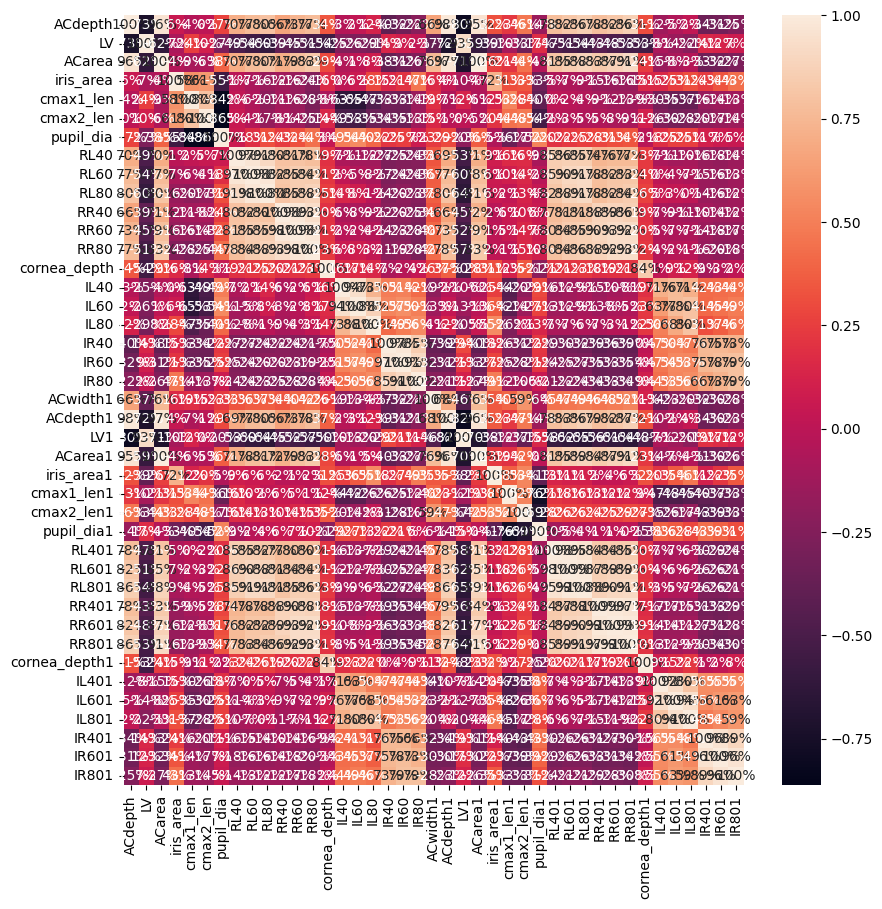

In [ ]:
#visualise the figure
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:42].corr(),annot=True,fmt=".0%")

In [ ]:
#to split the dataset into the depnetent and indepedent sets
x=df.iloc[:,1:42].values
y=df.iloc[:,42].values

In [ ]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
df.describe()

,ACwidth,ACdepth,LV,ACarea,iris_area,cmax1_len,cmax2_len,pupil_dia,RL40,RL60,...,RR601,RR801,cornea_depth1,IL401,IL601,IL801,IR401,IR601,IR801,Target
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,294.698925,74.322581,4.376344,14349.408602,2544.064516,104.215054,101.193548,100.225806,464.182796,1057.043011,...,1161.333333,2020.860215,16.784946,438.827957,703.032258,999.827957,432.612903,688.311828,964.903226,0.677419
std,13.481699,12.423821,6.300300,2966.334586,337.933998,12.513340,11.862673,22.136007,108.211342,223.719249,...,275.433979,435.768027,1.647458,62.246115,87.314705,119.171016,85.742541,116.411002,152.157603,0.469997
min,262.000000,45.000000,0.000000,8114.000000,1776.000000,73.000000,70.000000,52.000000,241.000000,640.000000,...,635.000000,1214.000000,12.000000,293.000000,513.000000,661.000000,286.000000,476.000000,684.000000,0.000000
25%,286.000000,67.000000,0.000000,12430.000000,2325.000000,95.000000,94.000000,86.000000,394.000000,918.000000,...,988.000000,1728.000000,16.000000,403.000000,648.000000,910.000000,375.000000,611.000000,857.000000,0.000000
50%,295.000000,73.000000,0.000000,14019.000000,2539.000000,105.000000,103.000000,99.000000,448.000000,1040.000000,...,1156.000000,2007.000000,17.000000,435.000000,695.000000,1000.000000,420.000000,676.000000,945.000000,1.000000
75%,303.000000,83.000000,8.000000,16471.000000,2755.000000,113.000000,110.000000,117.000000,525.000000,1199.000000,...,1345.000000,2286.000000,18.000000,474.000000,764.000000,1094.000000,486.000000,752.000000,1055.000000,1.000000
max,320.000000,99.000000,25.000000,20552.000000,3283.000000,136.000000,122.000000,157.000000,822.000000,1846.000000,...,2023.000000,3314.000000,20.000000,629.000000,906.000000,1329.000000,699.000000,1017.000000,1361.000000,1.000000


In [ ]:
print(x)

[[7.1000e+01 1.0000e+00 1.2474e+04 ... 3.5600e+02 5.5400e+02 7.8400e+02]
 [7.6000e+01 0.0000e+00 1.3722e+04 ... 4.9500e+02 7.4500e+02 1.0580e+03]
 [8.5000e+01 0.0000e+00 1.6389e+04 ... 4.3600e+02 7.3300e+02 1.0470e+03]
 ...
 [5.0000e+01 1.7000e+01 9.9900e+03 ... 6.9900e+02 1.0170e+03 1.3180e+03]
 [7.0000e+01 0.0000e+00 1.3068e+04 ... 4.2000e+02 6.2900e+02 8.8800e+02]
 [6.8000e+01 5.0000e+00 1.2173e+04 ... 6.1200e+02 8.8300e+02 1.2260e+03]]


In [ ]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [ ]:
def models(X_train,Y_train):
        #logistic regression
        from sklearn.linear_model import LogisticRegression
        log=LogisticRegression(random_state=0)
        log.fit(X_train,Y_train)


        #Decision Tree
        from sklearn.tree import DecisionTreeClassifier
        tree=DecisionTreeClassifier(random_state=0,criterion="entropy")
        tree.fit(X_train,Y_train)

        #Random Forest
        from sklearn.ensemble import RandomForestClassifier
        forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
        forest.fit(X_train,Y_train)

        #SVM
        from sklearn.svm import SVC
        clf = SVC(random_state=0)
        clf.fit(x_train, y_train)

        print('[0]logistic regression accuracy:',log.score(X_train,Y_train))
        print('[1]Decision tree accuracy:',tree.score(X_train,Y_train))
        print('[2]Random forest accuracy:',forest.score(X_train,Y_train))
        print('[3]SVM accuracy:',clf.score(X_train,Y_train))

        return log,tree,forest,clf


In [ ]:
model=models(x_train,y_train)

[0]logistic regression accuracy: 1.0
[1]Decision tree accuracy: 1.0
[2]Random forest accuracy: 1.0
[3]SVM accuracy: 0.9459459459459459


In [ ]:
# testing the models/result

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(y_test,model[i].predict(x_test)))
    print('Accuracy : ',accuracy_score(y_test,model[i].predict(x_test)))

Model 0
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.93      0.97        15

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19

Accuracy :  0.9473684210526315
Model 1
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.93      0.97        15

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19

Accuracy :  0.9473684210526315
Model 2
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         4
         1.0       1.00      0.87      0.93        15

    accuracy                           0.89        19
   macro avg       0.83      0.93      0.8